# STRING MATCHING

Jeison Robles Arias
___

In computer science, string-searching algorithms, sometimes called string-matching algorithms, are an important class of string algorithms that try to find a place where one or several strings (also called patterns) are found within a larger string or text.

During this notebook I'll work on two approaches about implementing String Matching.
1. Linear Search Algorithm through Naive String Matching.
2. Karp-Rabin String Matching Algorithm

___
### Naive String Matching

In [4]:
def naive_string_matching(text, pattern):
    n = len(text)
    m = len(pattern)
    positions = []

    print(f'Text len is: {n}' )
    print(f'Pattern len is: {m}')

    for i in range(n-m+1): #Slide over the text, this bring us with the amount of shiftings one can do through the entire text
        match = True
        for j in range(m):
            if text[i+j] != pattern[j]:
                match=False
                break
        if match:
            positions.append(i)
    return positions

In [6]:
naive_string_matching("Hello! I'm working on algorithm design","working")

Text len is: 46
Pattern len is: 7


[11, 39]

___
### Karp-Rabbin Algorithm

In [10]:
def karp_rabin_string_matching(text, pattern, prime = 101):
    n = len(text)
    m = len(pattern)
    base = 256 # Base for character value (ASCII)
    pattern_hash = 0
    text_hash = 0
    h = 1
    positions = []

    #Precompute base for use in hash function
    for _ in range(m-1):
        h = (h * base) % prime

    #Compute hash of patterns and first window of text
    for i in range(m):
        pattern_hash = (base * pattern_hash + ord(pattern[i])) % prime
        text_hash = (base * text_hash + ord(text[i])) % prime

    #Slide over the text
    for i in range(n - m + 1):
        #Check if hashes match  
        if pattern_hash == text_hash:
            #Check for specific text characters because of collisions, different strings can eventually have same hash value
            if text[i:i + m] == pattern:
                positions.append(i)

        #Compute the hash for the next window of text
        if i < n -m:
            text_hash = (base * (text_hash - ord(text[i]) * h) + ord(text[i + m])) % prime
            #Ensure positive hash values
            if text_hash < 0:
                text_hash += prime

    return positions

In [12]:
karp_rabin_string_matching("Hello! I'm working on algorithm design","working")

[11]

Text len is: 20006
Pattern len is: 6


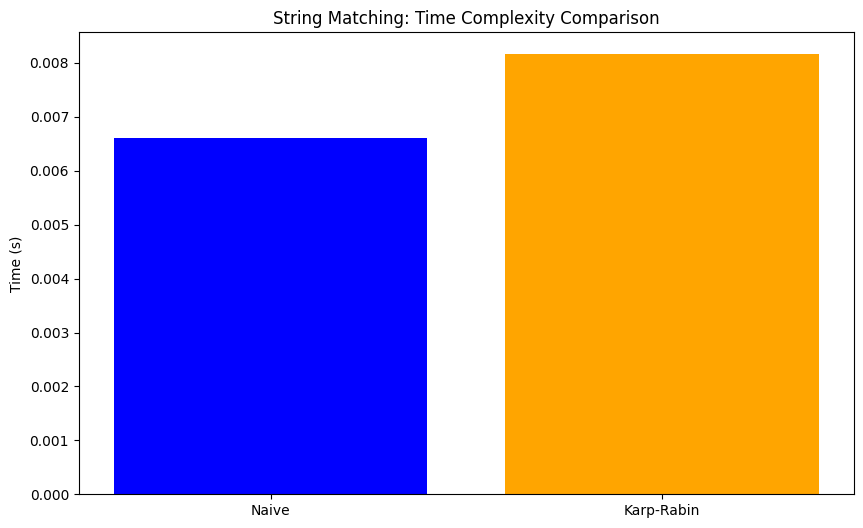

In [15]:
import time
import matplotlib.pyplot as plt

#Implementing measuring time function
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

#Generate text and patterns to search
text = "a" * 10000 + "needle" + "a" * 10000
pattern = "needle" #Pattern to search

#Measure time for naive algorithm
naive_time = measure_time(naive_string_matching, text, pattern)

#Measure time for Karp-Rabin Algorithm
karp_rabin_time = measure_time(karp_rabin_string_matching, text, pattern)

#Plotting stage
plt.figure(figsize=(10,6))
plt.bar(['Naive','Karp-Rabin'], [naive_time, karp_rabin_time], color = ['blue','orange'])
plt.title('String Matching: Time Complexity Comparison')
plt.ylabel('Time (s)')
plt.show()


Text len is: 1000
Pattern len is: 6
Text len is: 5000
Pattern len is: 6
Text len is: 10000
Pattern len is: 6
Text len is: 50000
Pattern len is: 6
Text len is: 100000
Pattern len is: 6
Text len is: 500000
Pattern len is: 6
Text len is: 1000000
Pattern len is: 6


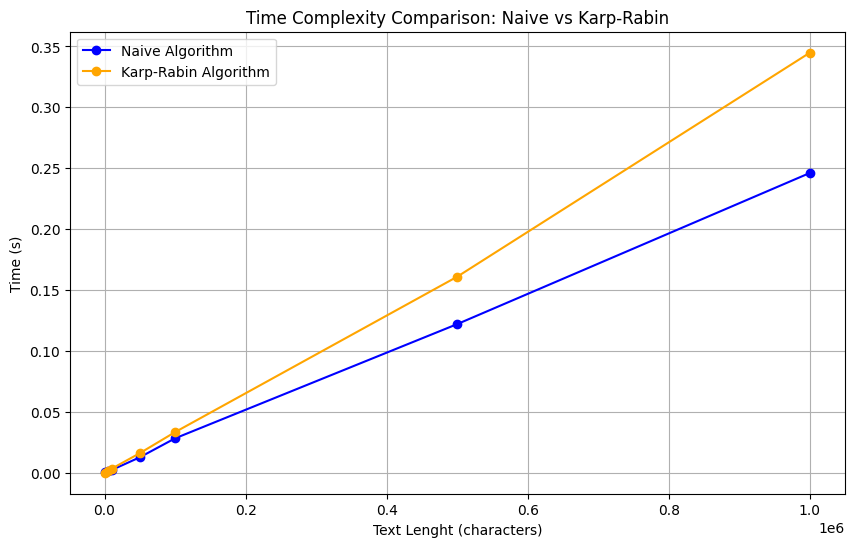

In [16]:
import time
import matplotlib.pyplot as plt

#Implementing measuring time function
def measure_time(func, *args):
    start_time = time.time()
    func(*args)
    return time.time() - start_time

#Generate text and patterns to search
pattern = "needle" #Pattern to search

#Create a list of text lenghts to test
text_lenghts = [1000,5000,10000,50000,100000,500000,1000000]

naive_times = []
karp_rabin_times = []

for lenght in text_lenghts:
    text = "a" * (lenght - len(pattern)) + pattern #Large text with pattern at the end

    #Measure time for naive algorithm
    naive_time = measure_time(naive_string_matching, text, pattern)
    naive_times.append(naive_time)

    #Measure time for Karp-Rabin Algorithm
    karp_rabin_time = measure_time(karp_rabin_string_matching, text, pattern)
    karp_rabin_times.append(karp_rabin_time)

#Plotting stage
plt.figure(figsize=(10,6))
plt.plot(text_lenghts, naive_times, label='Naive Algorithm', marker = 'o', color = 'blue')
plt.plot(text_lenghts, karp_rabin_times, label='Karp-Rabin Algorithm', marker = 'o', color = 'orange')
plt.title('Time Complexity Comparison: Naive vs Karp-Rabin')
plt.xlabel('Text Lenght (characters)')
plt.ylabel('Time (s)')
plt.legend()
plt.grid(True)
plt.show()
